In [1]:

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import datetime
from itertools import product
import warnings
from scipy import stats
import statsmodels.api as sm
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')


In [2]:
df = pd.read_csv('../input/bitcoin-historical-data/btcusd_1-min_data.csv')

In [3]:
df.head()

Timestamp  Open  High   Low  Close  Volume
0  1.325412e+09  4.58  4.58  4.58   4.58     0.0
1  1.325412e+09  4.58  4.58  4.58   4.58     0.0
2  1.325412e+09  4.58  4.58  4.58   4.58     0.0
3  1.325412e+09  4.58  4.58  4.58   4.58     0.0
4  1.325412e+09  4.58  4.58  4.58   4.58     0.0

In [4]:
df.tail()

Timestamp     Open     High      Low    Close    Volume
6718276  1.732406e+09  97768.0  97768.0  97767.0  97768.0  1.001276
6718277  1.732406e+09  97804.0  97804.0  97775.0  97775.0  1.081203
6718278  1.732406e+09  97775.0  97775.0  97775.0  97775.0  0.000000
6718279  1.732406e+09  97765.0  97765.0  97759.0  97759.0  0.384559
6718280           NaN  57854.0  57864.0  57835.0  57835.0  1.353466

# **Setting Data**

In [5]:
df.Timestamp = pd.to_datetime(df.Timestamp, unit='s')
df.index = df.Timestamp


df = df.resample('D').mean()
df = df[df['Timestamp'] >= '2019-11-13']
df_month = df.resample('M').mean()
df_year = df.resample('A-DEC').mean()
df_Q = df.resample('Q-DEC').mean()

In [6]:
df.head()

Timestamp         Open         High          Low  \
Timestamp                                                               
2019-11-13 2019-11-13 11:59:30  8750.370576  8754.997667  8746.450500   
2019-11-14 2019-11-14 11:59:30  8677.499215  8682.022368  8672.876292   
2019-11-15 2019-11-15 11:59:30  8575.835056  8580.334660  8570.964465   
2019-11-16 2019-11-16 11:59:30  8469.530549  8472.837493  8466.167042   
2019-11-17 2019-11-17 11:59:30  8498.468549  8501.751799  8495.732424   

                  Close    Volume  
Timestamp                          
2019-11-13  8750.546451  2.438014  
2019-11-14  8677.389479  2.336288  
2019-11-15  8575.710125  3.545540  
2019-11-16  8469.173097  0.942587  
2019-11-17  8498.527896  1.182995

In [7]:
df.tail()

Timestamp          Open          High           Low  \
Timestamp                                                                  
2024-11-20 2024-11-20 00:00:00  92434.000000  92479.000000  92395.000000   
2024-11-21 2024-11-21 15:40:00  97708.112112  97752.275275  97666.615616   
2024-11-22 2024-11-22 00:00:00  98451.000000  98547.000000  98442.000000   
2024-11-23 2024-11-23 15:40:00  98273.227227  98287.645646  98258.876877   
2024-11-24 2024-11-24 00:00:00  97765.000000  97765.000000  97759.000000   

                   Close    Volume  
Timestamp                           
2024-11-20  92461.000000  2.841287  
2024-11-21  97709.902903  4.403755  
2024-11-22  98525.000000  1.168008  
2024-11-23  98273.402402  1.227603  
2024-11-24  97759.000000  0.384559

# **Real Data Plot**

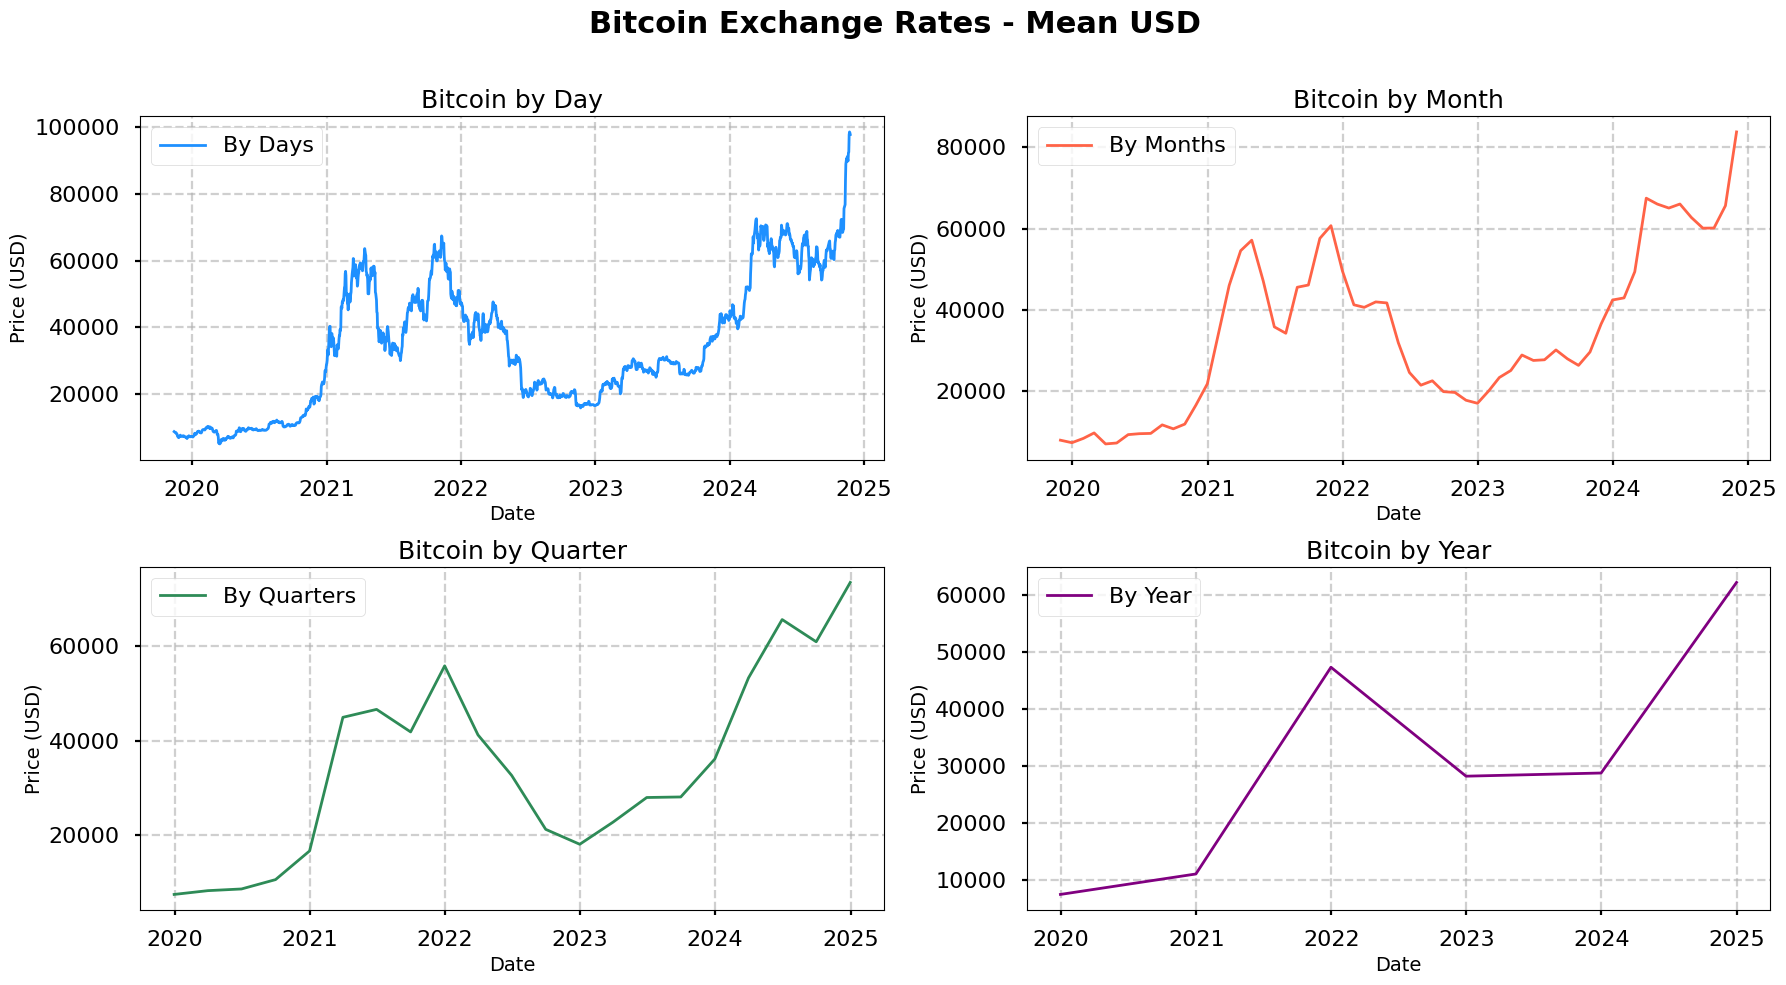

In [8]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=[18, 10])
plt.suptitle('Bitcoin Exchange Rates - Mean USD', fontsize=22, fontweight='bold')


plt.subplot(221)
plt.plot(df['Close'], '-', label='By Days', color='dodgerblue', linewidth=2)
plt.title('Bitcoin by Day', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(222)
plt.plot(df_month['Close'], '-', label='By Months', color='tomato', linewidth=2)
plt.title('Bitcoin by Month', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(223)
plt.plot(df_Q['Close'], '-', label='By Quarters', color='seagreen', linewidth=2)
plt.title('Bitcoin by Quarter', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(224)
plt.plot(df_year['Close'], '-', label='By Year', color='purple', linewidth=2)
plt.title('Bitcoin by Year', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)


plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()


# **Seasonal Decomposition**

The Dickey–Fuller test is: 0.8880451569614136
Not stationary


<Figure size 1700x600 with 0 Axes>

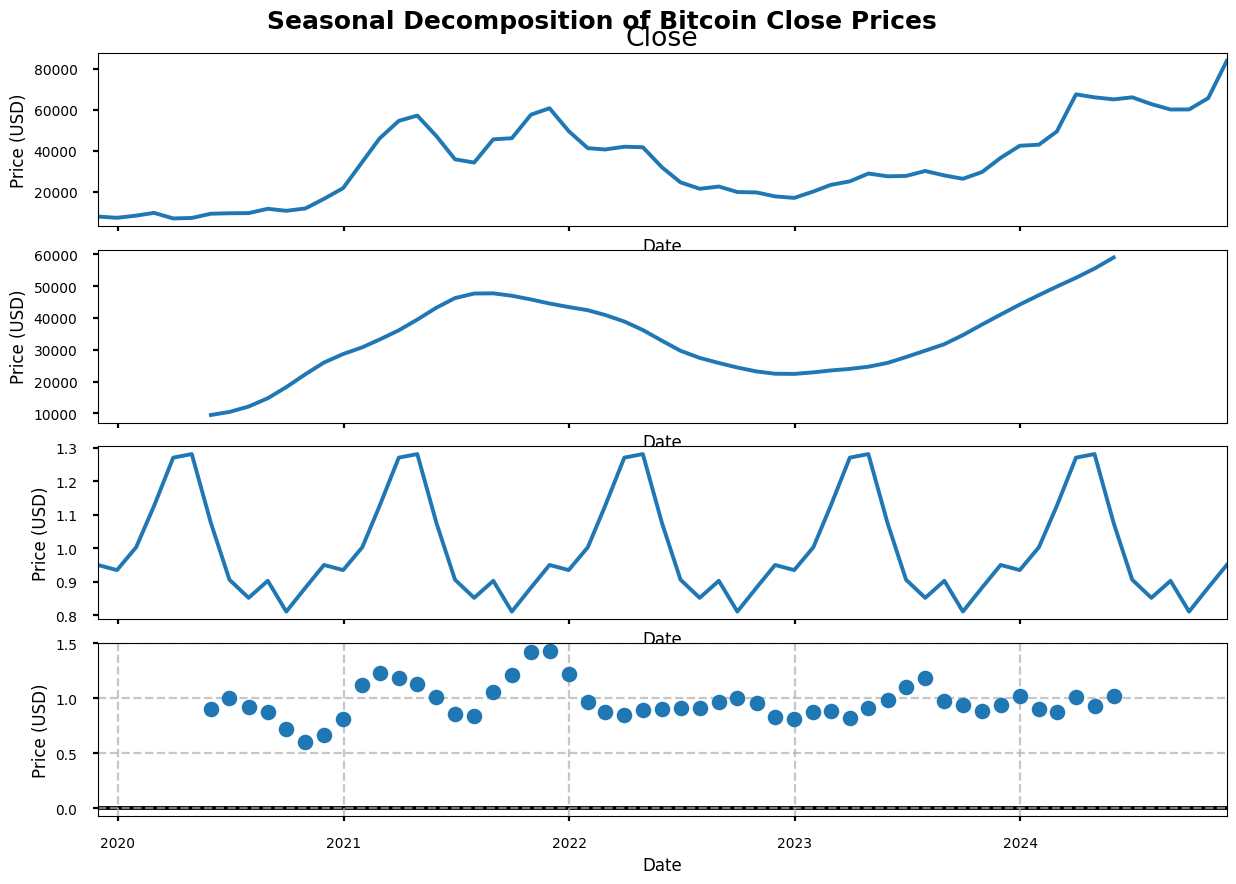

In [9]:
import matplotlib.pyplot as plt
import statsmodels.api as sm


plt.figure(figsize=[17, 6])


result = sm.tsa.seasonal_decompose(df_month['Close'], model='multiplicative', period=12)


result.plot()
plt.suptitle('Seasonal Decomposition of Bitcoin Close Prices', fontsize=18, fontweight='bold')
plt.subplots_adjust(top=0.93)  


for ax in plt.gcf().get_axes():
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Price (USD)', fontsize=12)
    ax.tick_params(axis='both', labelsize=10)


plt.grid(True, linestyle='--', alpha=0.7)
print(f'The Dickey–Fuller test is: {sm.tsa.stattools.adfuller(df_month.Close)[1]}')
print('Not stationary')

plt.show()




# **Box-Cox Transformation**

In [10]:
df_month['Close_box'], lmbda = stats.boxcox(df_month.Close)
print(f'The Dickey–Fuller test is: {sm.tsa.stattools.adfuller(df_month.Close_box)[1]}')
print('Not stationary')

The Dickey–Fuller test is: 0.6037023708251877
Not stationary


# **Seasonal Transformation**

In [11]:
df_month['Close_box_diff'] = df_month.Close_box - df_month.Close_box.shift(12)
print("The Dickey–Fuller test is: %f" % sm.tsa.stattools.adfuller(df_month.Close_box_diff[12:])[1])

The Dickey–Fuller test is: 0.001009


# **Regular Transformation**

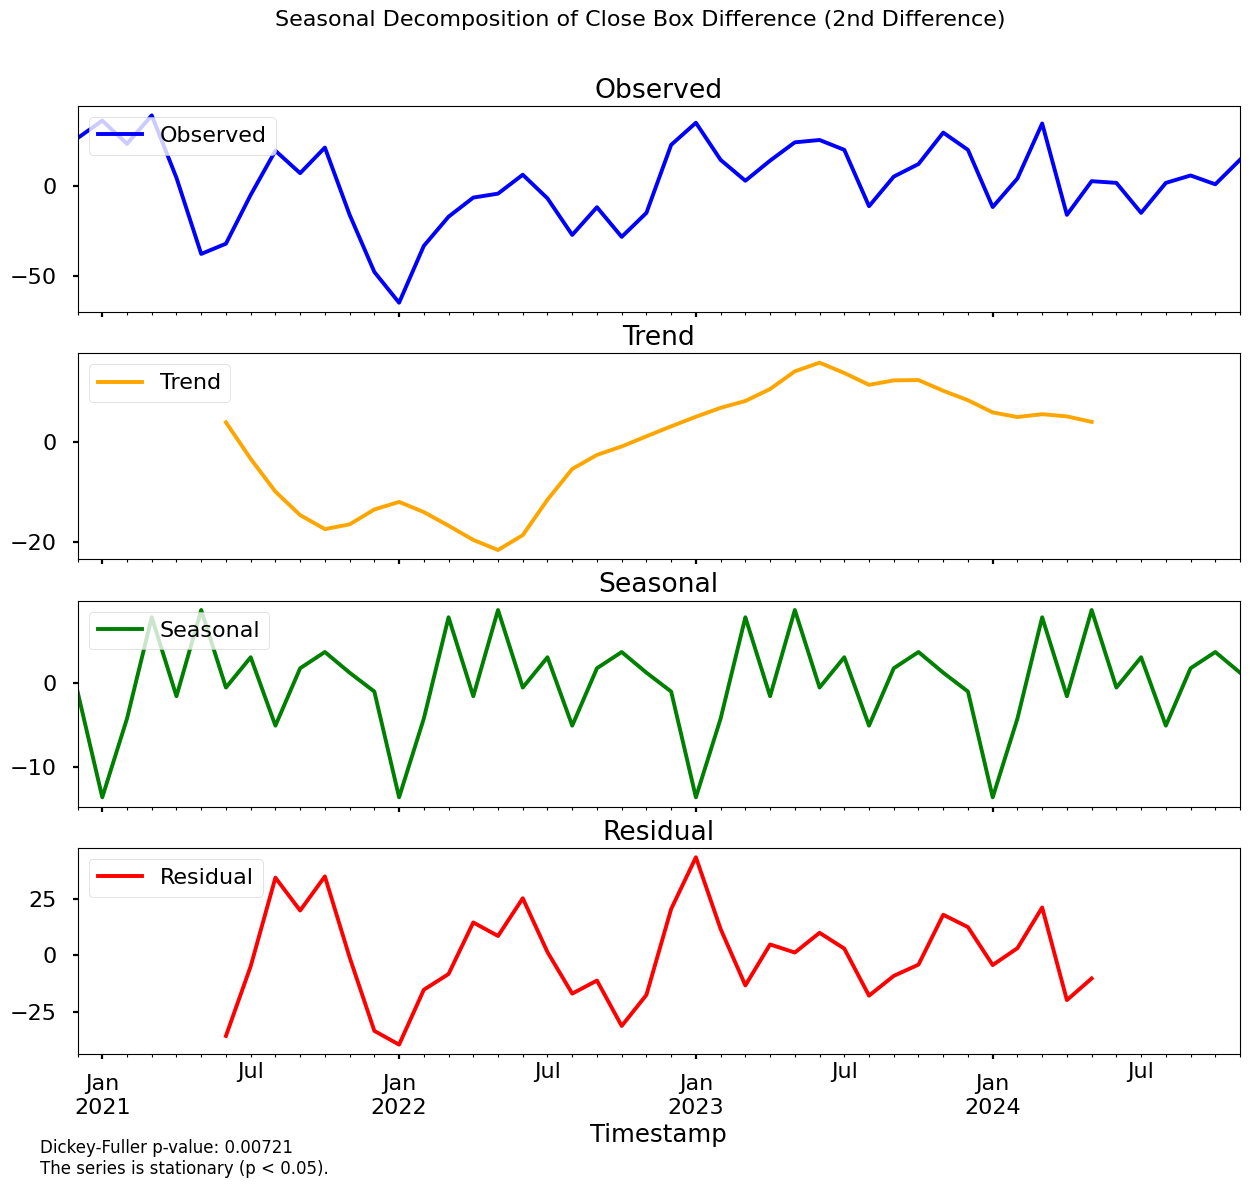

In [12]:
df_month['Close_box_diff2'] = df_month.Close_box_diff - df_month.Close_box_diff.shift(1)


adf_result = sm.tsa.stattools.adfuller(df_month.Close_box_diff2[13:])
p_value = adf_result[1]


if p_value < 0.05:
    stationarity_message = "The series is stationary (p < 0.05)."
else:
    stationarity_message = "The series is not stationary (p >= 0.05)."


result = sm.tsa.seasonal_decompose(df_month.Close_box_diff2[13:], model='additive', period=12)


fig, axes = plt.subplots(4, 1, figsize=(15, 12), sharex=True)


result.observed.plot(ax=axes[0], color='blue', label='Observed')
axes[0].set_title('Observed')
axes[0].legend(loc='upper left')

result.trend.plot(ax=axes[1], color='orange', label='Trend')
axes[1].set_title('Trend')
axes[1].legend(loc='upper left')

result.seasonal.plot(ax=axes[2], color='green', label='Seasonal')
axes[2].set_title('Seasonal')
axes[2].legend(loc='upper left')

result.resid.plot(ax=axes[3], color='red', label='Residual')
axes[3].set_title('Residual')
axes[3].legend(loc='upper left')


plt.suptitle('Seasonal Decomposition of Close Box Difference (2nd Difference)', fontsize=16)


plt.subplots_adjust(top=0.9)  # Adjust the title to not overlap with plots

# Display Dickey-Fuller test result at the bottom of the figure
plt.figtext(0.1, 0.01, f'Dickey-Fuller p-value: {p_value:.5f}\n{stationarity_message}', fontsize=12)


plt.show()


So we will choose d=1, D=1

# **ACF Plot**

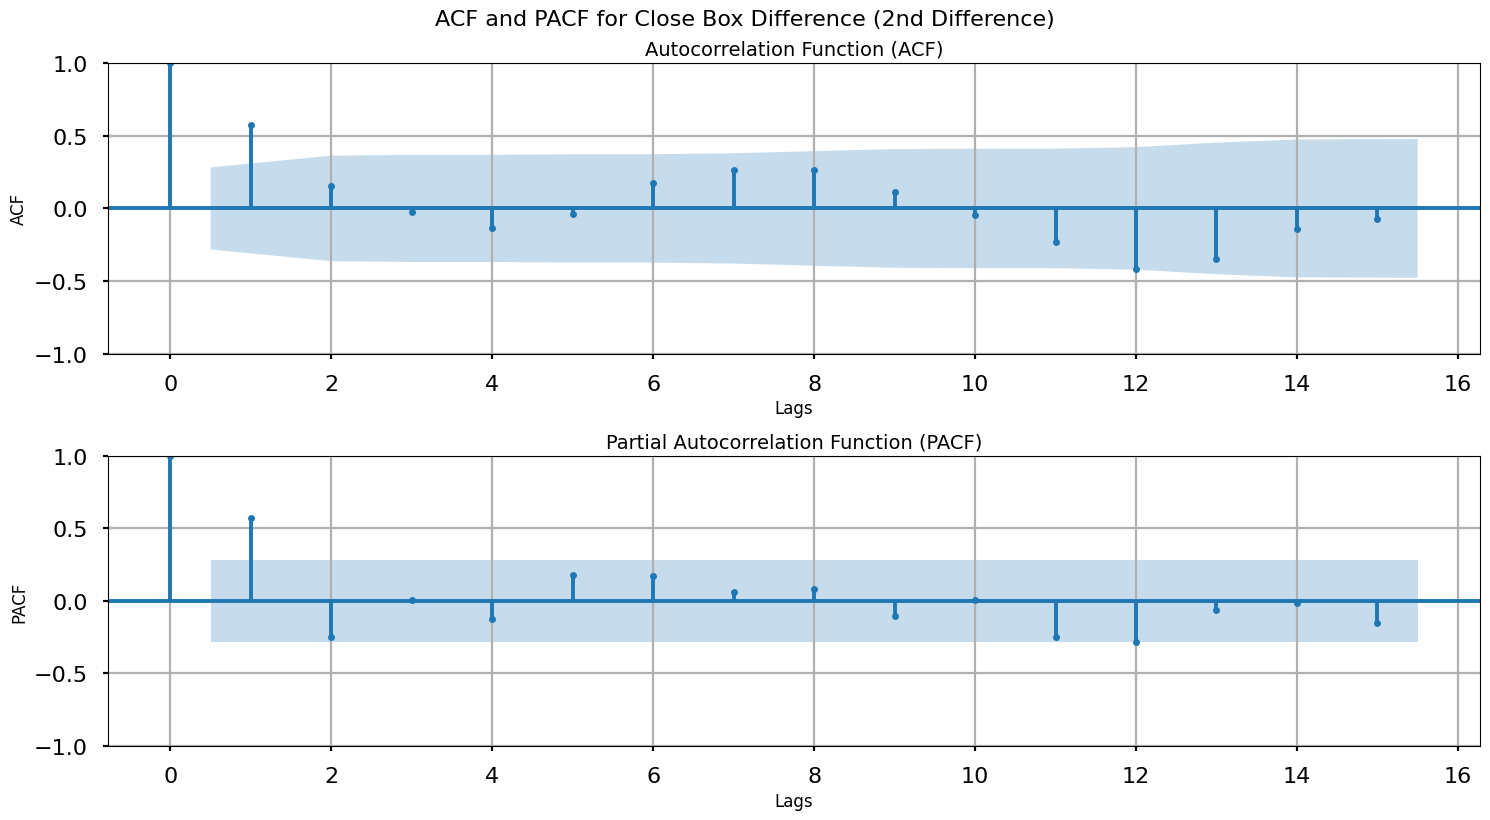

In [13]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Set the figure size for the plots
plt.figure(figsize=(15, 8))

# Create the ACF plot
ax1 = plt.subplot(211)
sm.graphics.tsa.plot_acf(df_month.Close_box_diff2[13:].values.squeeze(), lags=15, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)', fontsize=14)
ax1.set_xlabel('Lags', fontsize=12)
ax1.set_ylabel('ACF', fontsize=12)
ax1.grid(True)

# Create the PACF plot
ax2 = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df_month.Close_box_diff2[13:].values.squeeze(), lags=15, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)', fontsize=14)
ax2.set_xlabel('Lags', fontsize=12)
ax2.set_ylabel('PACF', fontsize=12)
ax2.grid(True)


plt.tight_layout()


plt.suptitle('ACF and PACF for Close Box Difference (2nd Difference)', fontsize=16, y=1.02)
plt.show()


# **Model Fitting**

In [14]:
import warnings
import statsmodels.api as sm
from itertools import product

# Set up parameter ranges for the SARIMAX grid search
Qs = range(0, 2)  # Seasonal AR order
qs = range(0, 3)  # Non-seasonal AR order
Ps = range(0, 3)  # Seasonal MA order
ps = range(0, 3)  # Non-seasonal MA order

# Seasonal difference (D) and non-seasonal difference (d) values
D = 1
d = 1

# Generate all combinations of parameters for SARIMAX
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)

# Initialize variables to store the best model and results
best_aic = float("inf")
best_model = None
best_param = None
results = []

# Suppress warnings during the search to keep the output clean
warnings.filterwarnings('ignore')

# Grid search for optimal SARIMAX parameters
for param in parameters_list:
    try:
        # Fit the SARIMAX model with current parameter combination
        model = sm.tsa.statespace.SARIMAX(df_month.Close_box, 
                                          order=(param[0], d, param[1]), 
                                          seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
        
        # Extract the AIC of the current model
        aic = model.aic
        
        # If the current model has a lower AIC, update the best model
        if aic < best_aic:
            best_aic = aic
            best_model = model
            best_param = param
        
        
        results.append([param, aic])
    
    except ValueError as e:
     
        print(f"Error with parameters {param}: {e}")
        continue

# Display the best parameter combination and corresponding AIC
print(f"Best AIC: {best_aic} with parameters: {best_param}")


Best AIC: 411.81156279482354 with parameters: (0, 1, 0, 1)


In [15]:
plt.figure(figsize=(15,7))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')
ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=12, ax=ax)

print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

plt.tight_layout()
plt.show()

Dickey–Fuller test:: p=0.000000


# **Inverse Box-Cox Transformation Function**

In [16]:
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

# **Future Prediction**

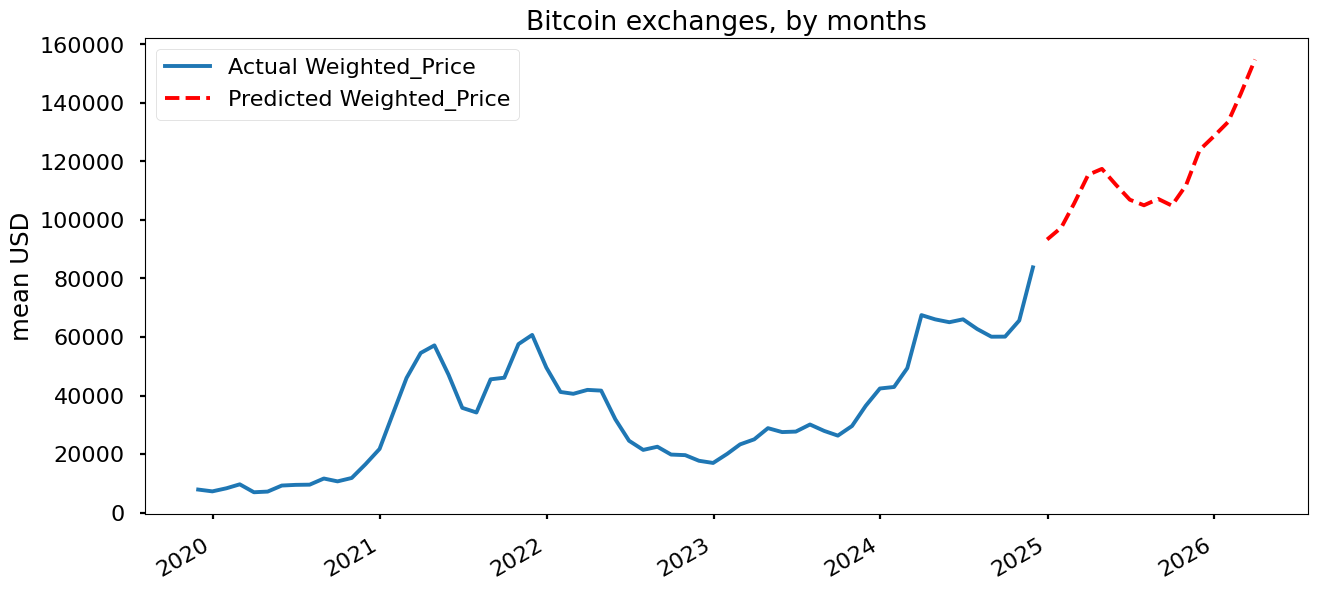

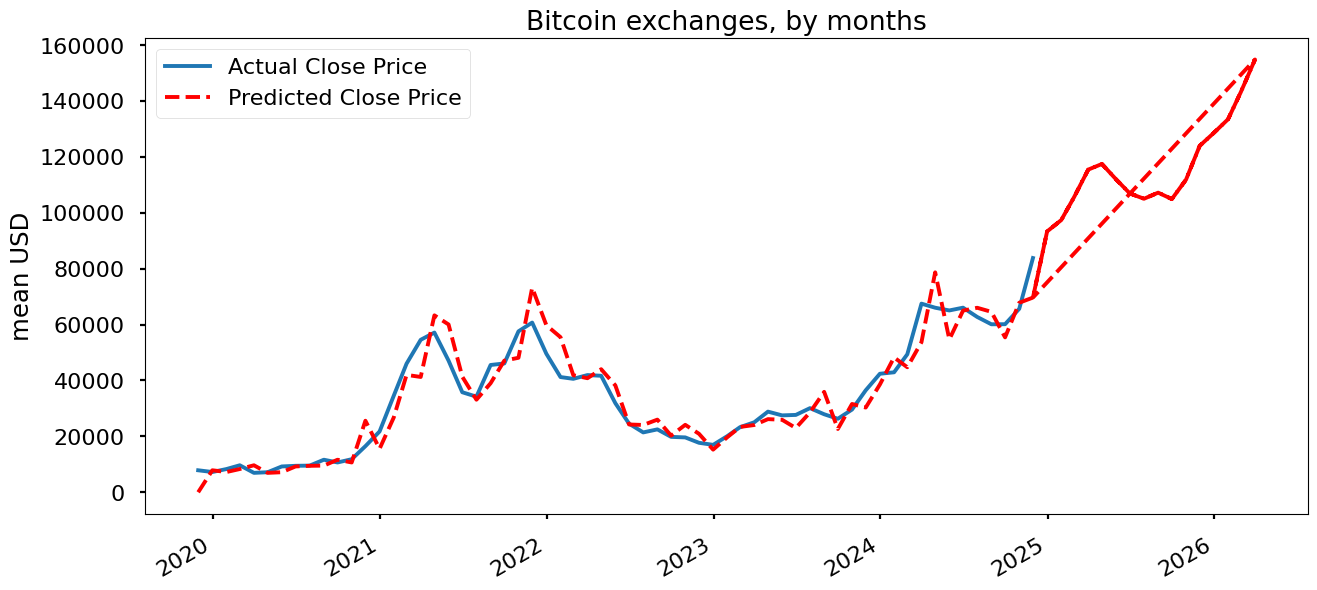

In [17]:
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_month is already defined and contains the necessary data



df_month2 = df_month[['Close']]


start_date = datetime(2024, 11, 24)
end_date = datetime(2026, 3, 31)

# Generate monthly dates from the start date to the end date
date_list = pd.date_range(start=start_date, end=end_date, freq='M')

# Create a DataFrame with future dates for prediction
future = pd.DataFrame(index=date_list, columns=df_month.columns)
df_month2 = pd.concat([df_month2, future])

# Make the forecast and apply the inverse Box-Cox transformation
df_month2['forecast'] = invboxcox(best_model.predict(start=len(df_month2)-len(future), end=len(df_month2)-1), lmbda)

# Plot the actual and predicted data
plt.figure(figsize=(15,7))
df_month2['Close'].plot(label='Actual Weighted_Price')
df_month2['forecast'].plot(color='r', ls='--', label='Predicted Weighted_Price')
plt.legend()
plt.title('Bitcoin exchanges, by months')
plt.ylabel('mean USD')
plt.show()
   
# Create a DataFrame with future dates for prediction
future = pd.DataFrame(index=date_list, columns=df_month.columns)
df_month2 = pd.concat([df_month2, future])

# Make the forecast and apply the inverse Box-Cox transformation
df_month2['forecast'] = invboxcox(best_model.predict(start=0, end=len(df_month2)-1), lmbda)


plt.figure(figsize=(15,7))
df_month2['Close'].plot(label='Actual Close Price')
df_month2['forecast'].plot(color='r', ls='--', label='Predicted Close Price')
plt.legend()
plt.title('Bitcoin exchanges, by months')
plt.ylabel('mean USD')
plt.show()

